In [3]:
import pandas as pd        # first step is to import the package! we usually use the alias 'pd'
import numpy as np         # pandas uses some numpy functionality so we want to import both!

# About pandas
[[Link](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html) to pandas documentation]

pandas will help us: 
* gain insight and knowledge that are obtained from translating and transforming digitally represented information.
* see patterns when data are transformed
* filter, modify, combine and compare data
* visualize data through charts, graphs, tables and other visualizations

pandas is built on top of numpy and gives us two ways to store data: **series** for one-dimensional data, and **dataFrames** for two dimensional data. We will mostly use dataFrames:

# DataFrames

![Image](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

DataFrames are similar to a spreadsheet that you'd see in a program like Excel or Google Sheets, and can store lots of different types. It has two important abilities that set it apart from other data processing programs:
* Ability to have custom indices for rows and columns - similar to dictionaries
* Supports missing data

Let's look at an example:

## Creating a DataFrame from scratch using dictionaries

In [6]:
#Let's make a list of the tallest buildings in each country. We start with a dictionary where the values are lists
dt = {"Country": ['China','UAE', 'United States'], 
      "Building": ['Shanghai Tower', 'Burj Khalifa','One World Trade Center'], 
      "Height in ft": [2073, 2717, 1776]}
# Then we can turn our dictionary into a DataFrame
df = pd.DataFrame(dt)   
# Let's see how pandas displays the data frame:
print(df)

         Country                Building  Height in ft
0          China          Shanghai Tower          2073
1            UAE            Burj Khalifa          2717
2  United States  One World Trade Center          1776


Notice how we have both strings and integers as data.

The integers on the far left column are the indices, and are indexed from 0 by default - but we can change them!

In [8]:
df.index = ['Country 1', 'Country 2', 'Country 3']
print(df)

                 Country                Building  Height in ft
Country 1          China          Shanghai Tower          2073
Country 2            UAE            Burj Khalifa          2717
Country 3  United States  One World Trade Center          1776


We can access specific columns and rows:

In [10]:
df["Building"]

Country 1            Shanghai Tower
Country 2              Burj Khalifa
Country 3    One World Trade Center
Name: Building, dtype: object

In [11]:
df.loc["Country 3"]        # equivalently, we could still use integer indices with iloc: df.iloc[2]

Country                  United States
Building        One World Trade Center
Height in ft                      1776
Name: Country 3, dtype: object

With the method loc, we can use slicing and subsets to get specific rows.

There are a ton of useful methods built into DataFrames. For example:

In [13]:
df["Height in ft"].max()

2717

In [14]:
df.describe()            # gives some basic statistics, looking only at the numerical data

,Height in ft
count,3.000000
mean,2188.666667
std,481.045043
min,1776.000000
25%,1924.500000
50%,2073.000000
75%,2395.000000
max,2717.000000


In [15]:
df.T                # transposes the data frame

,Country 1,Country 2,Country 3
Country,China,UAE,United States
Building,Shanghai Tower,Burj Khalifa,One World Trade Center
Height in ft,2073,2717,1776


### Practice

Follow the steps below to practice creating and using a dataFrame. Look up some simple data that is interesting to you or make up some statistics!

In [16]:
# Create a dictionary where the values are lists, and every list is the same length
dt = {}

In [17]:
# Turn the dictionary into a dataFrame

In [18]:
# Find some basic statistics on your numerical data. 
# You may want to transpose the dataFrame if the statistics 
# of the rows is more than the statistics of the columns.

In [19]:
# Use indexing or slicing to pull out and display one part of the dataFrame

This is useful, but once we start getting into bigger data sets it doesn't make sense to type in everything ourselves. 

Pandas lets us import data, such as from an excel file, and create a dataFrame out of it. 
## DataFrames from imported data

Download a copy of OLYMPICS_athlete_events.csv from this [link](https://domosoftware.sharepoint.com/:x:/s/CS-Edu-PublicFiles/EZ19VWkFzHdNpUFSLtUNauEBK9msN4pXiT7O02lPqsISOg?rtime=AOPiCRX92Ug). Make sure to place it in whatever folder your Jupyter notebook is running from.

In [6]:
olympics = pd.read_csv("OLYMPICS_athlete_events.csv")


The first thing we want to do is get a sense of what data we are working with. We can look at the first 5 (or however many) rows...

In [7]:
olympics.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


... as well as look at the data types in each column.

In [9]:
olympics.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Some of these are objects, which means they are unique types to this dataset. Another thing to notice is the "NaN" in the "Medal" column. This stands for not a number, and is similar to None or writing N/A. Often, large data sets will not be complete and we need to clean them, which we will see later. 

Like with our smaller dataFrame, we can select specific columns, rows, etc.

In [11]:
olympics['Sport']

0            Basketball
1                  Judo
2              Football
3            Tug-Of-War
4         Speed Skating
              ...      
271111             Luge
271112      Ski Jumping
271113      Ski Jumping
271114        Bobsleigh
271115        Bobsleigh
Name: Sport, Length: 271116, dtype: object

### Categorical Data
One interesting thing we can do with categorical data is return the counts of each category: 

In [12]:
olympics['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

This means that "Athletics" is the most popular sport (one with the most athletes), followed by Gymnastics

Another way to see this data is visually with a graph. It's a little difficult to fit all 66 sports on one graph, so let's look at the first 20:

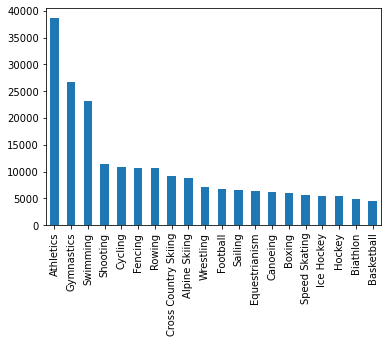

In [16]:
olympics['Sport'].value_counts()[0:20].plot(kind="bar")

### Filtering
We use the loc method notation to filter data using certain conditions

In [22]:
olympics.loc[olympics['Medal']=='Gold']      # Gold medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [23]:
olympics.loc[olympics['Year'] >= 2001]     # last 20 years of Olympic data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
72,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Downhill,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN


### Cleaning data example: Titanic

Work through the slides 18 through 22 at this [link](https://longbaonguyen.github.io/courses/apcsp/lect14c.pdf).  Copy the code from the slides and mess around with it a bit.

We are looking at the data of passengers on the Titanic, which is incomplete. The data set is available for download at this [link](https://domosoftware.sharepoint.com/:x:/s/CS-Edu-PublicFiles/EVMCyTmwGxVIuXqTAGpYfVAB07-UJFa7hVzqk1aj6kuaMg?e=4UlhmS).

We will be trying to create a model to predict the characteristics of passengers who survived. Creating models based off of incomplete data is a large portion of data science!

### Assignment: Find a dataset and determine some interesting information!
There are some cool ones at this [link](https://domohelp.domo.com/hc/en-us/articles/360043931814-Fun-Sample-DataSets), or you can find your own online! Start with a topic you are interested in, and try and find an excel file you can download

You should have a few values (such as mean, max, etc of certain series) accompanied by an explanation of how these values should be interpreted, and at least one figure such as a bar graph.

Screenshot this section (you may need multiple screenshots, which is okay) and submit on Classroom.